# Iowa Recidivism Exploratory Data Analysis

In [176]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

# read in the data

df = pd.read_csv("/Users/sborovoy/Documents/analyst_projs/recidivism_correlation/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv")

In [194]:
# Let's view the data types for our columns

df.dtypes

Fiscal Year Released                          int64
Recidivism Reporting Year                     int64
Race - Ethnicity                             object
Age At Release                               object
Convicting Offense Classification            object
Convicting Offense Type                      object
Convicting Offense Subtype                   object
Main Supervising District                    object
Release Type                                 object
Release type: Paroled to Detainder united    object
Part of Target Population                    object
Recidivism - Return to Prison numeric         int64
dtype: object

### Data Cleaning

In [178]:
# Let's check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Fiscal Year Released - 0.0%
Recidivism Reporting Year - 0.0%
Race - Ethnicity - 0.0011529592621060721%
Age At Release  - 0.00011529592621060722%
Convicting Offense Classification - 0.0%
Convicting Offense Type - 0.0%
Convicting Offense Subtype - 0.0%
Main Supervising District - 0.36821675634127593%
Release Type - 0.06771714066102998%
Release type: Paroled to Detainder united - 0.06771714066102998%
Part of Target Population - 0.0%
Recidivism - Return to Prison numeric - 0.0%


##### The data is mostly complete. For the follwoing questions, removing all rows with null values would decreaase the power of the analysis since the built in aggregate functions used ignore null values.

In [227]:
# Remove space at end of column name; fix typo in column name

df.rename(columns={'Age At Release ': 'Age At Release'}, inplace = True)

df.rename(columns={'Release type: Paroled to Detainder united': 'Release type: Paroled to Detainer united'}, inplace = True)

In [228]:
# Only change Under 25 value to 16-25 so that grouping by age will default sort the ages in ascending order

def custom_mapping(value):
    if value == 'Under 25':
        return '16-24'
    return value

# Apply the custom function to the 'Age At Release' column
df['Age At Release'] = df['Age At Release'].apply(custom_mapping)

In [229]:
# Verify the data was properly cleaned

df.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainer united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,16-24,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1


### Question 1: For people who returned to prison, what was the most common Convicting Offense Classification?

In [230]:
# filter the data

returned = df[df['Recidivism - Return to Prison numeric'] == 1]

# count the Convicting Offense Classifications for returning prisoners

returned['Convicting Offense Classification'].value_counts()

D Felony                                    3266
C Felony                                    2387
Aggravated Misdemeanor                      1636
Felony - Enhancement to Original Penalty     628
B Felony                                     586
Felony - Enhanced                             77
Special Sentence 2005                         49
Serious Misdemeanor                           46
Other Felony                                   3
Felony - Mandatory Minimum                     3
Name: Convicting Offense Classification, dtype: int64

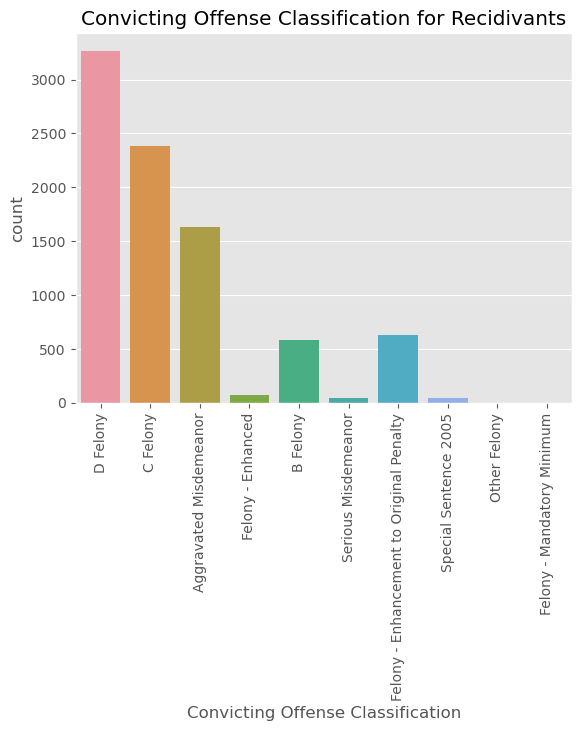

In [231]:
# Let's visualize the Convicting Offense Classification data for Recidivants

sns.countplot(x='Convicting Offense Classification', data=returned)

plt.title('Convicting Offense Classification for Recidivants')

plt.xticks(rotation=90)
plt.show()

### Question 2: Do certain age groups tend to get certain release types more frequently?

In [232]:
# group and count our data of interest
ages = df.groupby(['Age At Release', 'Release Type']).agg({'Release Type': 'count'}).unstack(fill_value=0)

# sum the row values
row_sums = ages.sum(axis=1)

# divide cells by corresponding sums to get percentages
ages_percentage = ages.div(row_sums, axis=0) * 100

# view the new data frame
ages_percentage

Release Type                            \
Release Type   Discharged End of Sentence Interstate Compact Parole   
Age At Release                                                        
16-24                           36.159660                  0.000000   
25-34                           29.662542                  0.011249   
35-44                           27.661029                  0.000000   
45-54                           29.490945                  0.000000   
55 and Older                    31.795302                  0.000000   

                                                     \
Release Type       Parole Paroled to Detainer - INS   
Age At Release                                        
16-24           57.770430                  0.614077   
25-34           65.331834                  0.551181   
35-44           68.050572                  0.632154   
45-54           67.009300                  0.416055   
55 and Older    62.583893                  0.419463   

                                                                              \
Release Type   Paroled to Detainer - Iowa Paroled to Detainer - Out of State   
Age At Release                                                                 
16-24                            0.519603                           0.543222   
25-34                            0.292463                           0.697413   
35-44                            0.153767                           0.597984   
45-54                            0.195791                           0.367107   
55 and Older                     0.083893                           0.167785   

                                                                     
Release Type   Paroled to Detainer - U.S. Marshall Special Sentence  
Age At Release                                                       
16-24                                     0.212565         4.180444  
25-34                                     0.314961         3.138358  
35-44                                     0.410046         2.494447  
45-54                                     0.318160         2.202643  
55 and Older                              0.251678         4.697987

### Question 3: Do prisonsers "age" out of recidivism?

In [233]:
# use previously filtered data frame of just recidivists and group by age
returned_by_age = returned.groupby('Age At Release').size()

# find percentage of recidivists for each age group
row_sums = ages.sum(axis=1)
recidivist_age_percentage = returned_by_age.div(row_sums, axis=0) * 100

# turn into a data frame
df_recidivist_percentage = pd.DataFrame({'Recidivism Percentage (%)': recidivist_age_percentage})

<Axes: xlabel='Age At Release'>

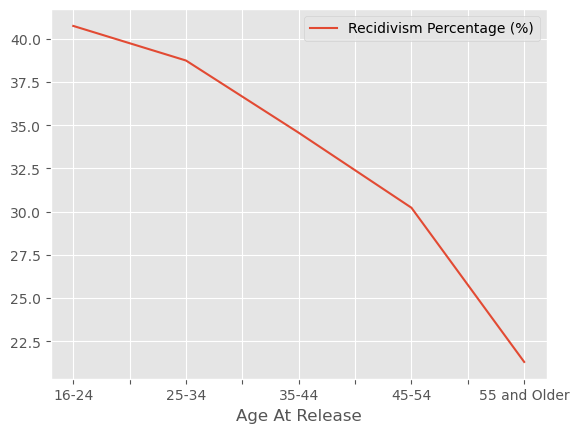

In [234]:
# Let's visualize this data frame

df_recidivist_percentage.plot()

### Question 4: Follow up on Question 3 - If older people are being discharged (instead of being put on parole) at higher rates, could this explain the negative correlation seen above between age and recidivism? Let's examine if this hypothesis is true.

In [263]:
# create the desired data frame

age_release = returned.groupby(['Age At Release', 'Release type: Paroled to Detainer united']).size().unstack()

In [252]:
# manipulate the data frame so that each element is a percent proportionate to the sums of its age group
# do this to account for the difference in the size of the groups
row_sums = age_release.sum(axis=1)
age_release_percentage = age_release.div(row_sums, axis=0) *100

# view the data
age_release_percentage

Release type: Paroled to Detainer united,Discharged End of Sentence,Parole,Paroled to Detainer,Special Sentence
Age At Release,,,,
16-24,27.747084,62.799263,1.596071,7.857581
25-34,21.398305,72.730024,1.029056,4.842615
35-44,20.295767,75.879653,0.968893,2.855686
45-54,21.338912,75.313808,0.836820,2.510460
55 and Older,22.314050,71.487603,0.413223,5.785124


<Axes: xlabel='Age At Release'>

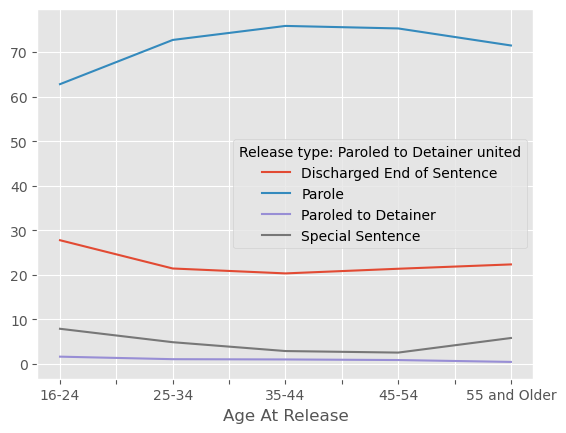

In [258]:
# Visualize the above data

age_release_percentage.plot()

Text(0.5, 1.0, 'Breakdown of Recidivants by Age and Release Type')

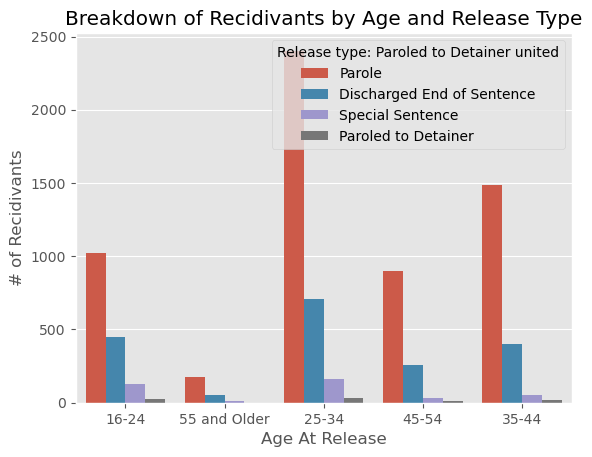

In [279]:
# Another visualization with absolute numbers instead of proportions

plt = sns.countplot(x ='Age At Release', data = returned, hue = 'Release type: Paroled to Detainer united')
plt.set_ylabel('# of Recidivants')
plt.set_title("Breakdown of Recidivants by Age and Release Type")

### Question 5: Did the Taget Group return to prison more often?

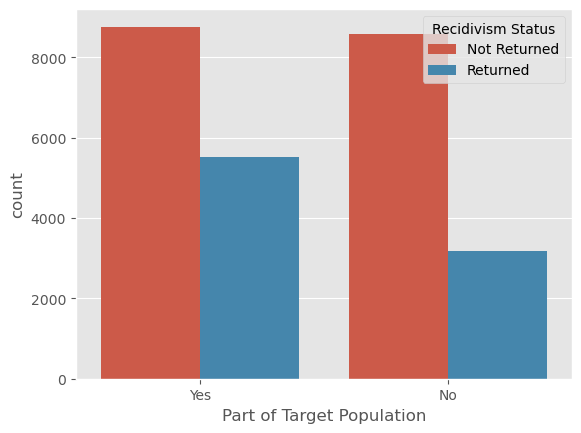

In [286]:
# Create the countplot

plot = sns.countplot(x = 'Part of Target Population', data = df, hue = 'Recidivism - Return to Prison numeric')

# Edit the legend for clarity

new_labels = ['Not Returned', 'Returned']
plot.legend(title='Recidivism Status', labels=new_labels)